In [1]:
# Pure Quant Return Prediction Model
def predict_returns(stock_universe):
    features = []
    
    # Technical factors (price/volume patterns)
    features.append(momentum_signals(prices, [1, 3, 12, 36]))  # Multi-timeframe momentum
    features.append(mean_reversion_signals(prices, [5, 20, 60]))  # Mean reversion
    features.append(volume_price_divergence(prices, volume))
    
    # Cross-sectional factors (relative to peers)
    features.append(relative_strength_rank(returns))
    features.append(volatility_rank(volatility))
    features.append(correlation_breakdown(correlation_matrix))
    
    # Market microstructure
    features.append(bid_ask_spread_changes())
    features.append(order_flow_imbalance())
    features.append(high_frequency_reversal())
    
    # Alternative data (no fundamental interpretation)
    features.append(satellite_parking_lot_changes())  # Don't care WHY, just that it predicts
    features.append(social_media_mention_velocity())
    features.append(news_sentiment_momentum())
    
    # Cross-asset signals
    features.append(bond_equity_correlation_breaks())
    features.append(currency_momentum_spillover())
    features.append(commodity_sector_rotation())
    
    # Ensemble prediction
    return ensemble_model.predict(features)  # Random Forest + XGBoost + Neural Network

In [2]:
# Cell 1: Import Libraries and Setup
"""
Cipher Project - Beginner Testing Notebook
This notebook is designed for experimenting with quantitative finance concepts
Each cell builds upon the previous ones, starting with basics and moving to more advanced topics
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("📊 Ready to start quantitative finance experiments")

✅ Libraries imported successfully!
📊 Ready to start quantitative finance experiments


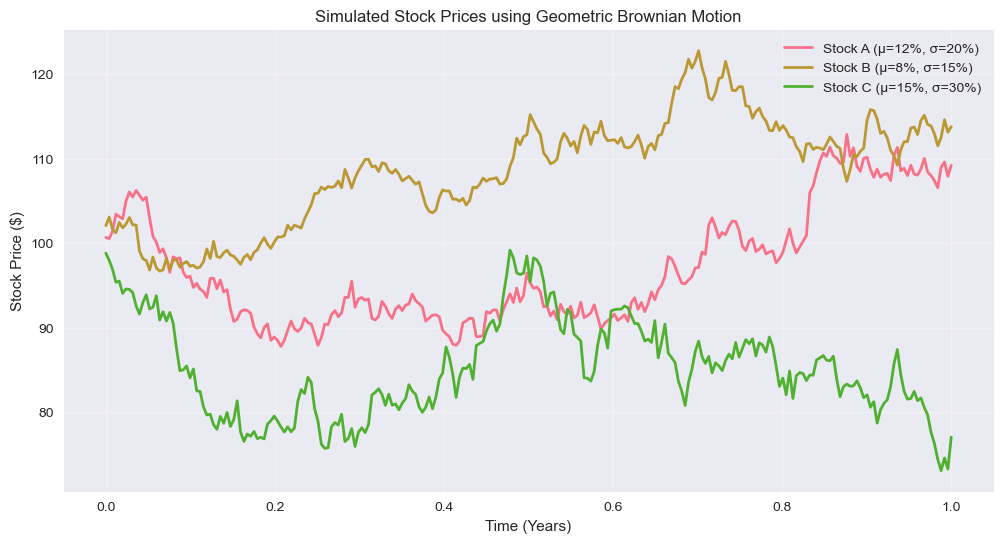

📈 Generated synthetic stock price data
Final prices: Stock A = $109.20, Stock B = $113.76, Stock C = $77.05


In [3]:
# Cell 2: Generate Synthetic Stock Price Data
"""
Let's start by creating fake stock price data using Geometric Brownian Motion
This is the foundation of modern finance - how stock prices are modeled mathematically
Formula: S(t) = S(0) * exp((μ - σ²/2)t + σW(t))
Where:
- S(t) = stock price at time t
- μ = expected return (drift)
- σ = volatility
- W(t) = Brownian motion (random walk)
"""

def generate_stock_prices(S0=100, mu=0.10, sigma=0.20, T=1.0, steps=252):
    """
    Generate stock prices using Geometric Brownian Motion
    
    Parameters:
    S0: Initial stock price ($100)
    mu: Annual expected return (10%)
    sigma: Annual volatility (20%)
    T: Time horizon in years (1 year)
    steps: Number of time steps (252 = trading days in a year)
    """
    dt = T / steps  # Time step size
    
    # Generate random shocks (the "randomness" in stock prices)
    random_shocks = np.random.normal(0, 1, steps)
    
    # Calculate price changes using GBM formula
    price_changes = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_shocks
    
    # Convert to actual prices by taking exponential and cumulative sum
    log_prices = np.cumsum(price_changes)
    prices = S0 * np.exp(log_prices)
    
    # Create time array
    times = np.linspace(0, T, steps)
    
    return times, prices

# Generate sample data for 3 different stocks
np.random.seed(42)  # For reproducible results
times, stock_A = generate_stock_prices(S0=100, mu=0.12, sigma=0.20)  # High return, medium vol
times, stock_B = generate_stock_prices(S0=100, mu=0.08, sigma=0.15)  # Medium return, low vol
times, stock_C = generate_stock_prices(S0=100, mu=0.15, sigma=0.30)  # High return, high vol

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(times, stock_A, label='Stock A (μ=12%, σ=20%)', linewidth=2)
plt.plot(times, stock_B, label='Stock B (μ=8%, σ=15%)', linewidth=2)
plt.plot(times, stock_C, label='Stock C (μ=15%, σ=30%)', linewidth=2)
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price ($)')
plt.title('Simulated Stock Prices using Geometric Brownian Motion')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("📈 Generated synthetic stock price data")
print(f"Final prices: Stock A = ${stock_A[-1]:.2f}, Stock B = ${stock_B[-1]:.2f}, Stock C = ${stock_C[-1]:.2f}")



📊 STOCK PERFORMANCE METRICS
   Final Price  Total Return  Annualized Return  Volatility  Sharpe Ratio  \
A       109.20          8.48              10.04       19.38          0.42   
B       113.76         11.47              12.02       14.92          0.67   
C        77.05        -22.02             -20.50       29.87         -0.75   

   Max Drawdown  
A        -17.36  
B        -12.59  
C        -26.30  


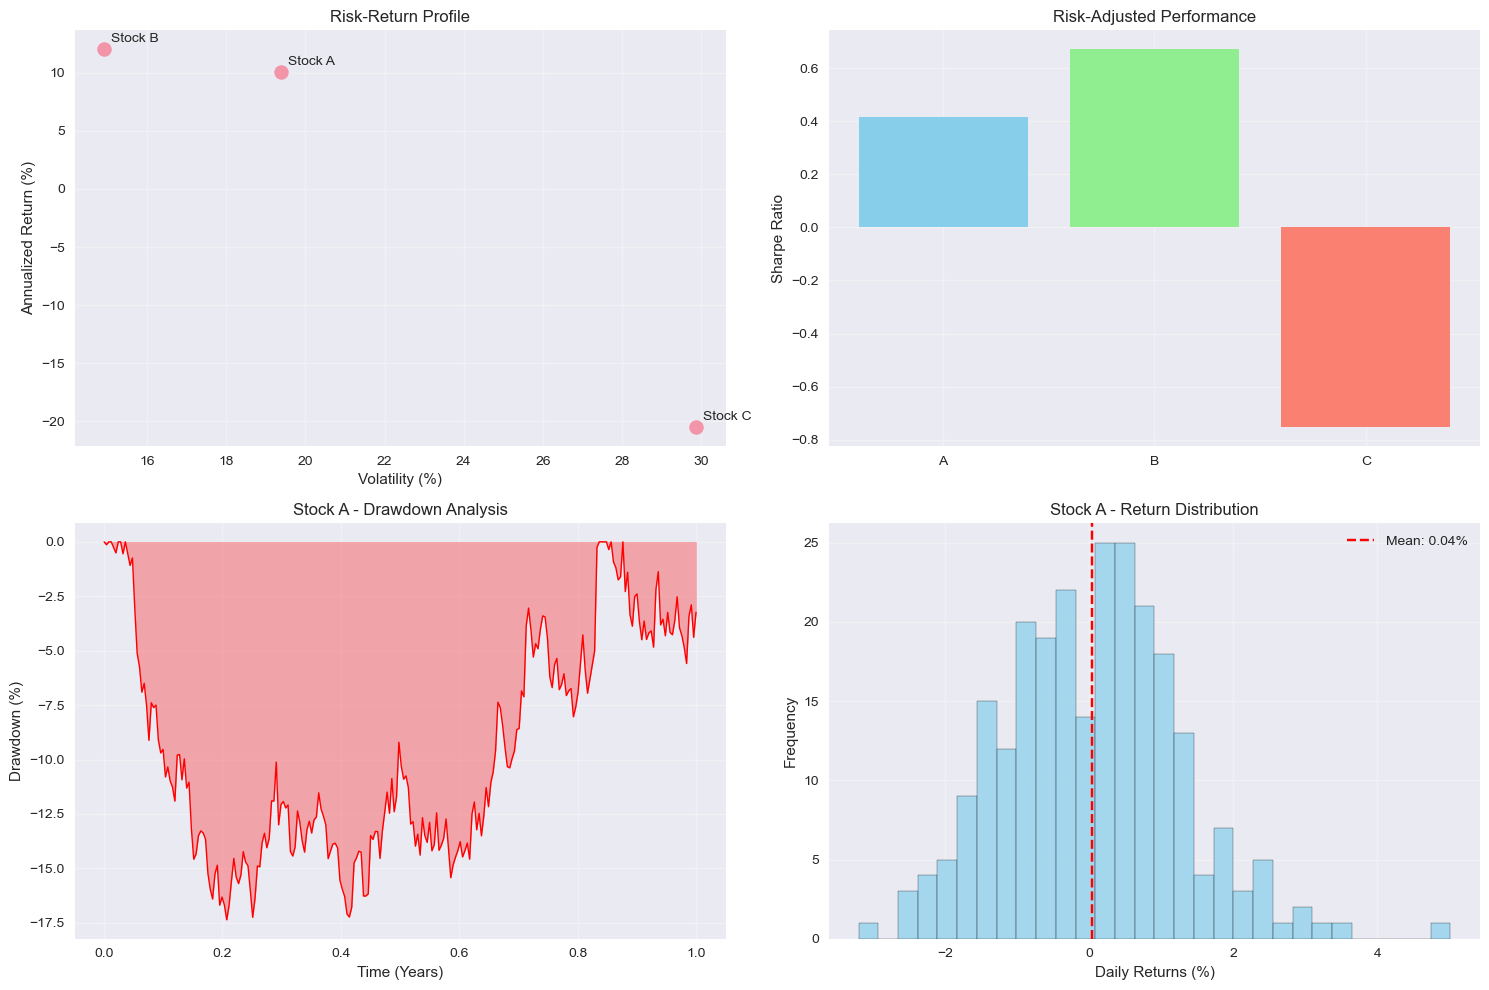

In [4]:
# Cell 3: Calculate Basic Financial Metrics
"""
Now let's calculate some fundamental metrics that quantitative traders use:
- Returns (daily percentage changes)
- Volatility (standard deviation of returns)
- Sharpe Ratio (risk-adjusted return)
- Maximum Drawdown (worst peak-to-trough decline)
"""

def calculate_returns(prices):
    """Calculate daily returns from price series"""
    return np.diff(prices) / prices[:-1]

def calculate_volatility(returns, annualize=True):
    """Calculate volatility (standard deviation of returns)"""
    vol = np.std(returns)
    if annualize:
        vol *= np.sqrt(252)  # Annualize using 252 trading days
    return vol

def calculate_sharpe_ratio(returns, risk_free_rate=0.02):
    """Calculate Sharpe ratio (excess return per unit of risk)"""
    excess_returns = np.mean(returns) * 252 - risk_free_rate  # Annualized excess return
    volatility = calculate_volatility(returns)
    return excess_returns / volatility if volatility > 0 else 0

def calculate_max_drawdown(prices):
    """Calculate maximum drawdown (worst peak-to-trough decline)"""
    cumulative_returns = prices / prices[0]  # Normalize to start at 1
    running_max = np.maximum.accumulate(cumulative_returns)
    drawdowns = (cumulative_returns - running_max) / running_max
    return np.min(drawdowns)

# Calculate metrics for all stocks
stocks = {'A': stock_A, 'B': stock_B, 'C': stock_C}
results = {}

for name, prices in stocks.items():
    returns = calculate_returns(prices)
    
    results[name] = {
        'Final Price': prices[-1],
        'Total Return': (prices[-1] / prices[0] - 1) * 100,
        'Annualized Return': (np.mean(returns) * 252) * 100,
        'Volatility': calculate_volatility(returns) * 100,
        'Sharpe Ratio': calculate_sharpe_ratio(returns),
        'Max Drawdown': calculate_max_drawdown(prices) * 100
    }

# Display results in a nice table
results_df = pd.DataFrame(results).T
print("\n📊 STOCK PERFORMANCE METRICS")
print("=" * 60)
print(results_df.round(2))

# Visualize the metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Returns vs Risk scatter plot
axes[0,0].scatter([results[stock]['Volatility'] for stock in results], 
                 [results[stock]['Annualized Return'] for stock in results], 
                 s=100, alpha=0.7)
for i, stock in enumerate(results.keys()):
    axes[0,0].annotate(f'Stock {stock}', 
                      (results[stock]['Volatility'], results[stock]['Annualized Return']),
                      xytext=(5, 5), textcoords='offset points')
axes[0,0].set_xlabel('Volatility (%)')
axes[0,0].set_ylabel('Annualized Return (%)')
axes[0,0].set_title('Risk-Return Profile')
axes[0,0].grid(True, alpha=0.3)

# Sharpe Ratios
sharpe_ratios = [results[stock]['Sharpe Ratio'] for stock in results]
axes[0,1].bar(results.keys(), sharpe_ratios, color=['skyblue', 'lightgreen', 'salmon'])
axes[0,1].set_ylabel('Sharpe Ratio')
axes[0,1].set_title('Risk-Adjusted Performance')
axes[0,1].grid(True, alpha=0.3)

# Drawdown analysis for Stock A
cumulative_A = stock_A / stock_A[0]
running_max_A = np.maximum.accumulate(cumulative_A)
drawdowns_A = (cumulative_A - running_max_A) / running_max_A * 100

axes[1,0].fill_between(times, drawdowns_A, 0, color='red', alpha=0.3)
axes[1,0].plot(times, drawdowns_A, color='red', linewidth=1)
axes[1,0].set_ylabel('Drawdown (%)')
axes[1,0].set_xlabel('Time (Years)')
axes[1,0].set_title('Stock A - Drawdown Analysis')
axes[1,0].grid(True, alpha=0.3)

# Return distribution
returns_A = calculate_returns(stock_A) * 100
axes[1,1].hist(returns_A, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,1].axvline(np.mean(returns_A), color='red', linestyle='--', label=f'Mean: {np.mean(returns_A):.2f}%')
axes[1,1].set_xlabel('Daily Returns (%)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Stock A - Return Distribution')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



📋 OPTIONS PRICING TABLE (Stock Price: $109.20)
   Strike  Call Price  Put Price  Call Intrinsic  Put Intrinsic
0      80      30.199      0.001          29.204          0.000
1      85      25.273      0.013          24.204          0.000
2      90      20.393      0.071          19.204          0.000
3      95      15.668      0.284          14.204          0.000
4     100      11.302      0.856           9.204          0.000
5     105       7.555      2.046           4.204          0.000
6     110       4.635      4.064           0.000          0.796
7     115       2.595      6.963           0.000          5.796
8     120       1.324     10.630           0.000         10.796


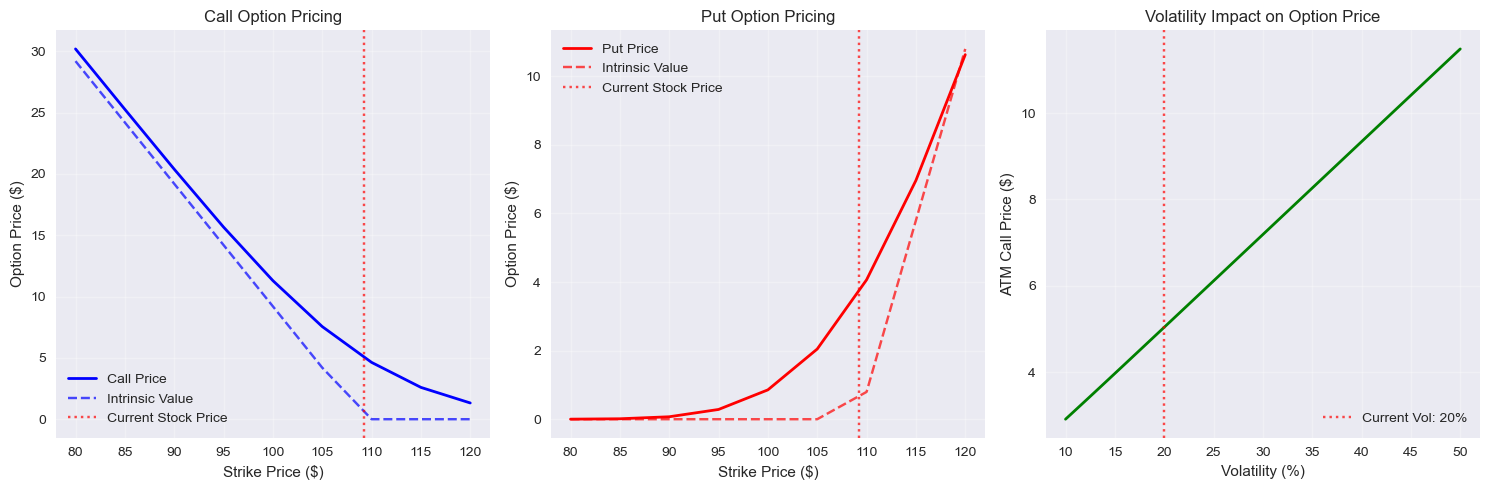

🎯 Black-Scholes implementation complete!
💡 Key insight: At-the-money call with 20% vol costs $5.04


In [5]:
# Cell 4: Black-Scholes Option Pricing (The Foundation!)
"""
Now we implement the famous Black-Scholes formula for pricing European options
This is ESSENTIAL knowledge for any quantitative trader
The formula gives us the theoretical price of an option based on:
- S: Current stock price
- K: Strike price
- T: Time to expiration
- r: Risk-free rate
- σ: Volatility
"""

from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate Black-Scholes call option price
    
    Parameters:
    S: Current stock price
    K: Strike price
    T: Time to expiration (in years)
    r: Risk-free interest rate
    sigma: Volatility (annualized)
    """
    # Calculate d1 and d2 parameters
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    # Calculate call price using cumulative normal distribution
    call_price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    """Calculate Black-Scholes put option price using put-call parity"""
    call_price = black_scholes_call(S, K, T, r, sigma)
    put_price = call_price - S + K*np.exp(-r*T)  # Put-call parity
    return put_price

# Example: Price options on Stock A
current_price = stock_A[-1]  # Use final price from our simulation
strike_prices = np.arange(80, 121, 5)  # Strike prices from $80 to $120
time_to_expiry = 0.25  # 3 months
risk_free_rate = 0.05  # 5%
implied_vol = 0.20  # 20% volatility

# Calculate option prices for different strikes
call_prices = [black_scholes_call(current_price, K, time_to_expiry, risk_free_rate, implied_vol) 
               for K in strike_prices]
put_prices = [black_scholes_put(current_price, K, time_to_expiry, risk_free_rate, implied_vol) 
              for K in strike_prices]

# Create options pricing table
options_df = pd.DataFrame({
    'Strike': strike_prices,
    'Call Price': call_prices,
    'Put Price': put_prices,
    'Call Intrinsic': np.maximum(current_price - strike_prices, 0),
    'Put Intrinsic': np.maximum(strike_prices - current_price, 0)
})

print(f"\n📋 OPTIONS PRICING TABLE (Stock Price: ${current_price:.2f})")
print("=" * 70)
print(options_df.round(3))

# Visualize option pricing
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(strike_prices, call_prices, 'b-', linewidth=2, label='Call Price')
plt.plot(strike_prices, np.maximum(current_price - strike_prices, 0), 'b--', alpha=0.7, label='Intrinsic Value')
plt.axvline(current_price, color='red', linestyle=':', alpha=0.7, label='Current Stock Price')
plt.xlabel('Strike Price ($)')
plt.ylabel('Option Price ($)')
plt.title('Call Option Pricing')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(strike_prices, put_prices, 'r-', linewidth=2, label='Put Price')
plt.plot(strike_prices, np.maximum(strike_prices - current_price, 0), 'r--', alpha=0.7, label='Intrinsic Value')
plt.axvline(current_price, color='red', linestyle=':', alpha=0.7, label='Current Stock Price')
plt.xlabel('Strike Price ($)')
plt.ylabel('Option Price ($)')
plt.title('Put Option Pricing')
plt.legend()
plt.grid(True, alpha=0.3)

# Show how option prices change with volatility
vol_range = np.linspace(0.1, 0.5, 50)
atm_call_prices = [black_scholes_call(current_price, current_price, time_to_expiry, risk_free_rate, vol) 
                   for vol in vol_range]

plt.subplot(1, 3, 3)
plt.plot(vol_range * 100, atm_call_prices, 'g-', linewidth=2)
plt.axvline(implied_vol * 100, color='red', linestyle=':', alpha=0.7, label=f'Current Vol: {implied_vol*100:.0f}%')
plt.xlabel('Volatility (%)')
plt.ylabel('ATM Call Price ($)')
plt.title('Volatility Impact on Option Price')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎯 Black-Scholes implementation complete!")
print(f"💡 Key insight: At-the-money call with {implied_vol*100:.0f}% vol costs ${black_scholes_call(current_price, current_price, time_to_expiry, risk_free_rate, implied_vol):.2f}")



🔢 OPTION GREEKS ANALYSIS
Stock Price: $109.20 | Strike: $109.20 | Time to Expiry: 0.25 years

Call Option Greeks:
  Delta: 0.5695
  Gamma: 0.0360
  Theta: -0.0313
  Vega: 0.2145
  Rho: 0.1429

Put Option Greeks:
  Delta: -0.4305
  Gamma: 0.0360
  Theta: -0.0166
  Vega: 0.2145
  Rho: -0.1267


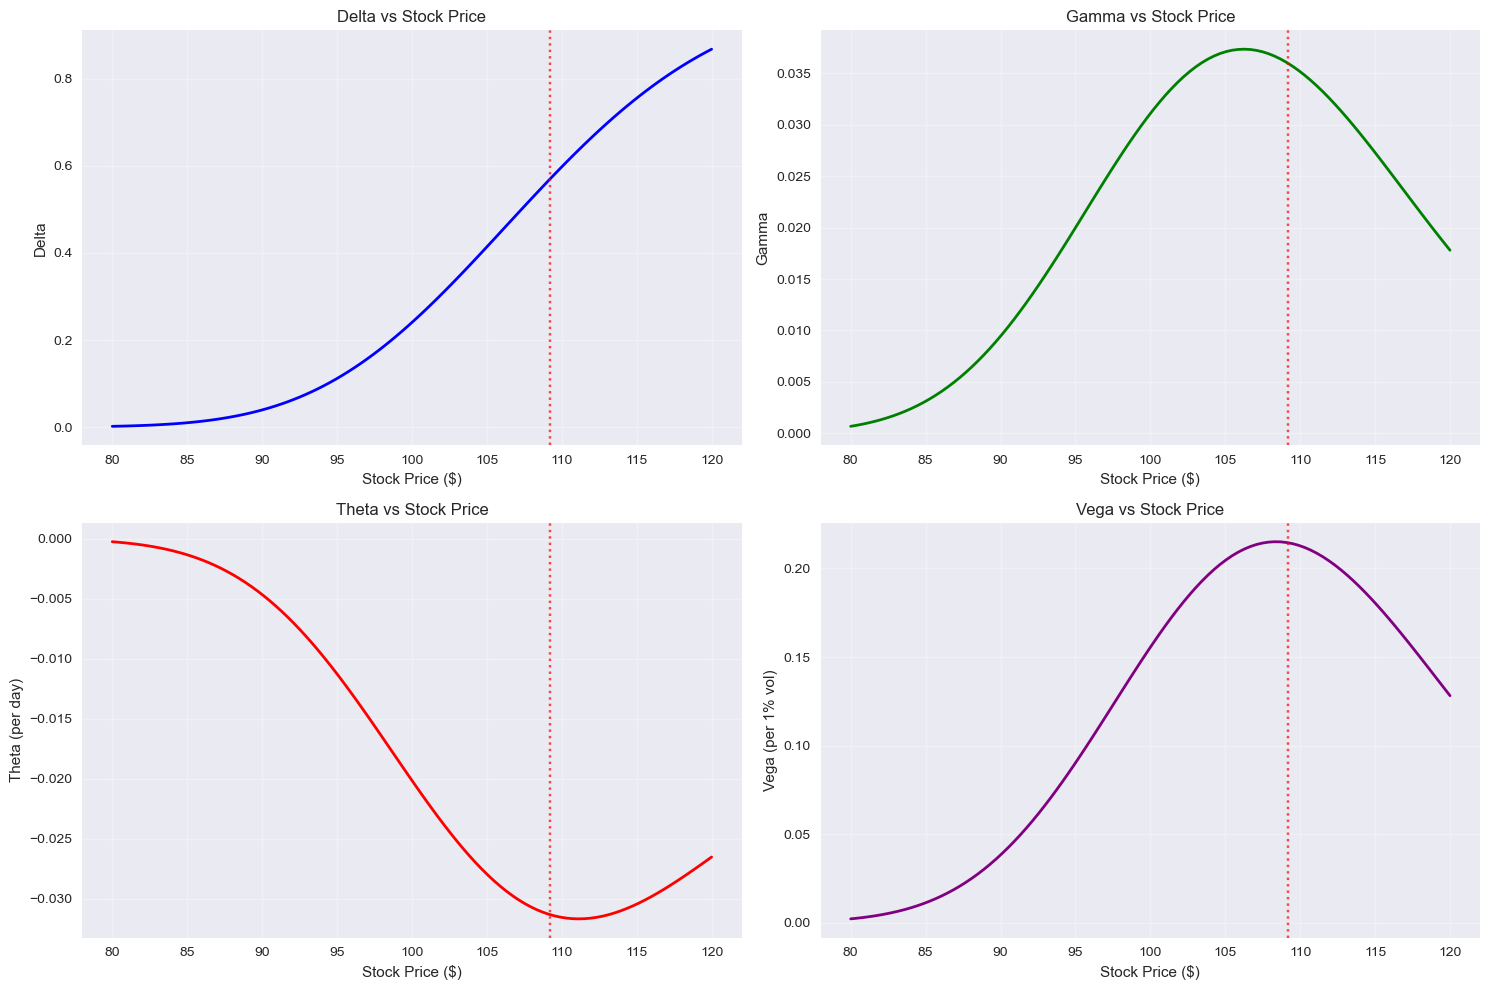

📊 Greeks analysis complete!
💡 Key insights:
   - Delta = 0.569: Option price changes ~$0.569 per $1 stock move
   - Theta = -0.031: Option loses ~$0.031 per day to time decay
   - Vega = 0.215: Option price changes ~$0.215 per 1% vol change


In [6]:
# Cell 5: Calculate Option Greeks (Risk Sensitivities)
"""
The "Greeks" measure how sensitive option prices are to different factors:
- Delta: Sensitivity to stock price changes
- Gamma: Rate of change of Delta
- Theta: Time decay
- Vega: Sensitivity to volatility changes
- Rho: Sensitivity to interest rate changes

These are CRUCIAL for risk management and hedging strategies!
"""

def calculate_greeks(S, K, T, r, sigma, option_type='call'):
    """Calculate all the Greeks for a given option"""
    
    # Basic Black-Scholes parameters
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    # Standard normal probability density function
    phi = lambda x: np.exp(-0.5*x**2) / np.sqrt(2*np.pi)
    
    greeks = {}
    
    if option_type == 'call':
        # Call option Greeks
        greeks['Delta'] = norm.cdf(d1)
        greeks['Gamma'] = phi(d1) / (S * sigma * np.sqrt(T))
        greeks['Theta'] = (-S * phi(d1) * sigma / (2 * np.sqrt(T)) 
                          - r * K * np.exp(-r*T) * norm.cdf(d2)) / 365
        greeks['Vega'] = S * phi(d1) * np.sqrt(T) / 100  # Per 1% vol change
        greeks['Rho'] = K * T * np.exp(-r*T) * norm.cdf(d2) / 100  # Per 1% rate change
        
    else:  # put option
        greeks['Delta'] = norm.cdf(d1) - 1
        greeks['Gamma'] = phi(d1) / (S * sigma * np.sqrt(T))  # Same as call
        greeks['Theta'] = (-S * phi(d1) * sigma / (2 * np.sqrt(T)) 
                          + r * K * np.exp(-r*T) * norm.cdf(-d2)) / 365
        greeks['Vega'] = S * phi(d1) * np.sqrt(T) / 100  # Same as call
        greeks['Rho'] = -K * T * np.exp(-r*T) * norm.cdf(-d2) / 100
    
    return greeks

# Calculate Greeks for at-the-money options
atm_strike = current_price
call_greeks = calculate_greeks(current_price, atm_strike, time_to_expiry, risk_free_rate, implied_vol, 'call')
put_greeks = calculate_greeks(current_price, atm_strike, time_to_expiry, risk_free_rate, implied_vol, 'put')

# Display Greeks
print("\n🔢 OPTION GREEKS ANALYSIS")
print("=" * 50)
print(f"Stock Price: ${current_price:.2f} | Strike: ${atm_strike:.2f} | Time to Expiry: {time_to_expiry:.2f} years")
print("\nCall Option Greeks:")
for greek, value in call_greeks.items():
    print(f"  {greek}: {value:.4f}")

print("\nPut Option Greeks:")  
for greek, value in put_greeks.items():
    print(f"  {greek}: {value:.4f}")

# Visualize how Greeks change with stock price
stock_range = np.linspace(80, 120, 100)
call_deltas = []
call_gammas = []
call_thetas = []
call_vegas = []

for S in stock_range:
    greeks = calculate_greeks(S, atm_strike, time_to_expiry, risk_free_rate, implied_vol, 'call')
    call_deltas.append(greeks['Delta'])
    call_gammas.append(greeks['Gamma'])
    call_thetas.append(greeks['Theta'])
    call_vegas.append(greeks['Vega'])

# Plot Greeks
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].plot(stock_range, call_deltas, 'b-', linewidth=2)
axes[0,0].axvline(current_price, color='red', linestyle=':', alpha=0.7)
axes[0,0].set_xlabel('Stock Price ($)')
axes[0,0].set_ylabel('Delta')
axes[0,0].set_title('Delta vs Stock Price')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].plot(stock_range, call_gammas, 'g-', linewidth=2)
axes[0,1].axvline(current_price, color='red', linestyle=':', alpha=0.7)
axes[0,1].set_xlabel('Stock Price ($)')
axes[0,1].set_ylabel('Gamma')
axes[0,1].set_title('Gamma vs Stock Price')
axes[0,1].grid(True, alpha=0.3)

axes[1,0].plot(stock_range, call_thetas, 'r-', linewidth=2)
axes[1,0].axvline(current_price, color='red', linestyle=':', alpha=0.7)
axes[1,0].set_xlabel('Stock Price ($)')
axes[1,0].set_ylabel('Theta (per day)')
axes[1,0].set_title('Theta vs Stock Price')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].plot(stock_range, call_vegas, 'purple', linewidth=2)
axes[1,1].axvline(current_price, color='red', linestyle=':', alpha=0.7)
axes[1,1].set_xlabel('Stock Price ($)')
axes[1,1].set_ylabel('Vega (per 1% vol)')
axes[1,1].set_title('Vega vs Stock Price')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Greeks analysis complete!")
print("💡 Key insights:")
print(f"   - Delta = {call_greeks['Delta']:.3f}: Option price changes ~${call_greeks['Delta']:.3f} per $1 stock move")
print(f"   - Theta = {call_greeks['Theta']:.3f}: Option loses ~${abs(call_greeks['Theta']):.3f} per day to time decay")
print(f"   - Vega = {call_greeks['Vega']:.3f}: Option price changes ~${call_greeks['Vega']:.3f} per 1% vol change")



📈 PORTFOLIO OPTIMIZATION SETUP
Expected Annual Returns:
Stock_A    0.1004
Stock_B    0.1202
Stock_C   -0.2050
dtype: float64

Covariance Matrix:
          Stock_A   Stock_B   Stock_C
Stock_A  0.037704  0.000519  0.005474
Stock_B  0.000519  0.022341 -0.004314
Stock_C  0.005474 -0.004314  0.089563

🎯 OPTIMAL PORTFOLIO RESULTS
Optimal Weights:
  Stock A: 31.9%
  Stock B: 68.1%
  Stock C: 0.0%

Portfolio Metrics:
  Expected Return: 11.4%
  Volatility: 12.0%
  Sharpe Ratio: 0.782


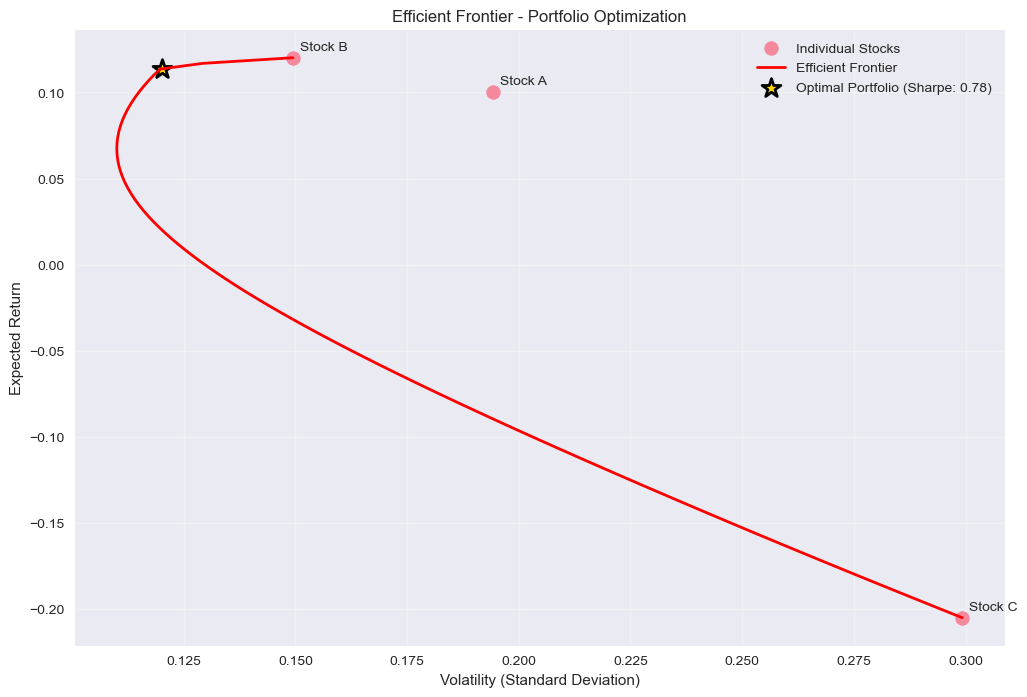

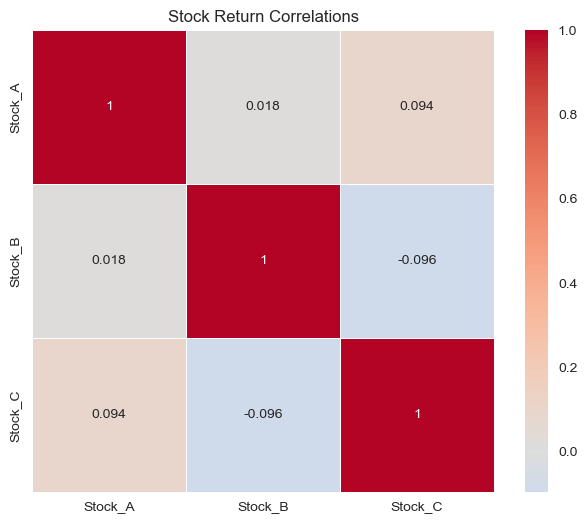

🔍 Portfolio optimization complete!
💡 Key insights:
   - Diversification reduces risk: Portfolio vol (12.0%) < average individual vol
   - Optimal allocation favors higher Sharpe ratio stocks
   - Correlations affect diversification benefits: Lower correlation = better diversification


In [7]:
# Cell 6: Simple Portfolio Optimization (Mean-Variance)
"""
Now let's implement Markowitz portfolio optimization - the foundation of modern portfolio theory
We'll find the optimal allocation between our three stocks to maximize risk-adjusted returns
This introduces concepts of:
- Expected returns and covariance estimation
- Efficient frontier calculation
- Risk-return optimization
"""

# Create returns matrix for our three stocks
returns_A = calculate_returns(stock_A)
returns_B = calculate_returns(stock_B) 
returns_C = calculate_returns(stock_C)

# Combine into a returns matrix
returns_matrix = np.column_stack([returns_A, returns_B, returns_C])
returns_df = pd.DataFrame(returns_matrix, columns=['Stock_A', 'Stock_B', 'Stock_C'])

# Calculate expected returns and covariance matrix
expected_returns = returns_df.mean() * 252  # Annualize
cov_matrix = returns_df.cov() * 252  # Annualize

print("📈 PORTFOLIO OPTIMIZATION SETUP")
print("=" * 40)
print("Expected Annual Returns:")
print(expected_returns.round(4))
print("\nCovariance Matrix:")
print(cov_matrix.round(6))

# Portfolio optimization functions
def portfolio_performance(weights, returns, cov_matrix):
    """Calculate portfolio return and volatility"""
    port_return = np.sum(returns * weights)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_return, port_volatility

def negative_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate=0.02):
    """Objective function to minimize (negative Sharpe ratio)"""
    port_return, port_volatility = portfolio_performance(weights, returns, cov_matrix)
    sharpe = (port_return - risk_free_rate) / port_volatility
    return -sharpe  # Minimize negative = maximize positive

# Constraints and bounds
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # Weights sum to 1
bounds = tuple((0, 1) for _ in range(3))  # No short selling (weights between 0 and 1)
initial_guess = [1/3, 1/3, 1/3]  # Equal weights starting point

# Find optimal portfolio
result = minimize(negative_sharpe_ratio, 
                 initial_guess, 
                 args=(expected_returns, cov_matrix),
                 method='SLSQP',
                 bounds=bounds,
                 constraints=constraints)

optimal_weights = result.x
optimal_return, optimal_volatility = portfolio_performance(optimal_weights, expected_returns, cov_matrix)
optimal_sharpe = (optimal_return - 0.02) / optimal_volatility

print(f"\n🎯 OPTIMAL PORTFOLIO RESULTS")
print("=" * 40)
print(f"Optimal Weights:")
for i, stock in enumerate(['Stock A', 'Stock B', 'Stock C']):
    print(f"  {stock}: {optimal_weights[i]:.1%}")
print(f"\nPortfolio Metrics:")
print(f"  Expected Return: {optimal_return:.1%}")
print(f"  Volatility: {optimal_volatility:.1%}")
print(f"  Sharpe Ratio: {optimal_sharpe:.3f}")

# Generate efficient frontier
def generate_efficient_frontier(returns, cov_matrix, num_portfolios=100):
    """Generate points along the efficient frontier"""
    target_returns = np.linspace(returns.min(), returns.max(), num_portfolios)
    efficient_portfolios = []
    
    for target in target_returns:
        # Minimize volatility for given return target
        constraints = [
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Weights sum to 1
            {'type': 'eq', 'fun': lambda x: np.sum(returns * x) - target}  # Target return
        ]
        
        result = minimize(lambda x: np.sqrt(np.dot(x.T, np.dot(cov_matrix, x))),
                         initial_guess,
                         method='SLSQP',
                         bounds=bounds,
                         constraints=constraints)
        
        if result.success:
            port_return, port_vol = portfolio_performance(result.x, returns, cov_matrix)
            efficient_portfolios.append([port_vol, port_return])
    
    return np.array(efficient_portfolios)

# Generate efficient frontier
efficient_frontier = generate_efficient_frontier(expected_returns, cov_matrix)

# Plot efficient frontier and individual stocks
plt.figure(figsize=(12, 8))

# Plot individual stocks
individual_vols = [np.sqrt(cov_matrix.iloc[i,i]) for i in range(3)]
individual_returns = [expected_returns.iloc[i] for i in range(3)]
stock_names = ['Stock A', 'Stock B', 'Stock C']

plt.scatter(individual_vols, individual_returns, 
           s=100, alpha=0.8, label='Individual Stocks')

for i, name in enumerate(stock_names):
    plt.annotate(name, (individual_vols[i], individual_returns[i]), 
                xytext=(5, 5), textcoords='offset points')

# Plot efficient frontier
plt.plot(efficient_frontier[:, 0], efficient_frontier[:, 1], 
         'r-', linewidth=2, label='Efficient Frontier')

# Plot optimal portfolio
plt.scatter(optimal_volatility, optimal_return, 
           s=200, color='gold', marker='*', 
           label=f'Optimal Portfolio (Sharpe: {optimal_sharpe:.2f})', 
           edgecolors='black', linewidth=2)

plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier - Portfolio Optimization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Show correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = returns_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Stock Return Correlations')
plt.show()

print("🔍 Portfolio optimization complete!")
print("💡 Key insights:")
print(f"   - Diversification reduces risk: Portfolio vol ({optimal_volatility:.1%}) < average individual vol")
print(f"   - Optimal allocation favors higher Sharpe ratio stocks")
print(f"   - Correlations affect diversification benefits: Lower correlation = better diversification")



📊 MOMENTUM STRATEGY BACKTEST RESULTS
   Total Trades  Win Rate  Avg Win  Avg Loss  Total Return  Strategy Sharpe  \
A         156.0     44.23     1.90     -1.95        -38.43          -131.90   
B         152.0     51.32     1.55     -1.93        -22.24           -86.60   
C         168.0     45.83     3.28     -3.43        -59.26          -118.24   

   Strategy Volatility  
A                14.70  
B                12.97  
C                25.28  

📈 STRATEGY vs BUY-AND-HOLD COMPARISON
Stock A:
  Buy & Hold: 8.5%
  Strategy: -38.4%
  Outperformance: -46.9%

Stock B:
  Buy & Hold: 11.5%
  Strategy: -22.2%
  Outperformance: -33.7%

Stock C:
  Buy & Hold: -22.0%
  Strategy: -59.3%
  Outperformance: -37.2%



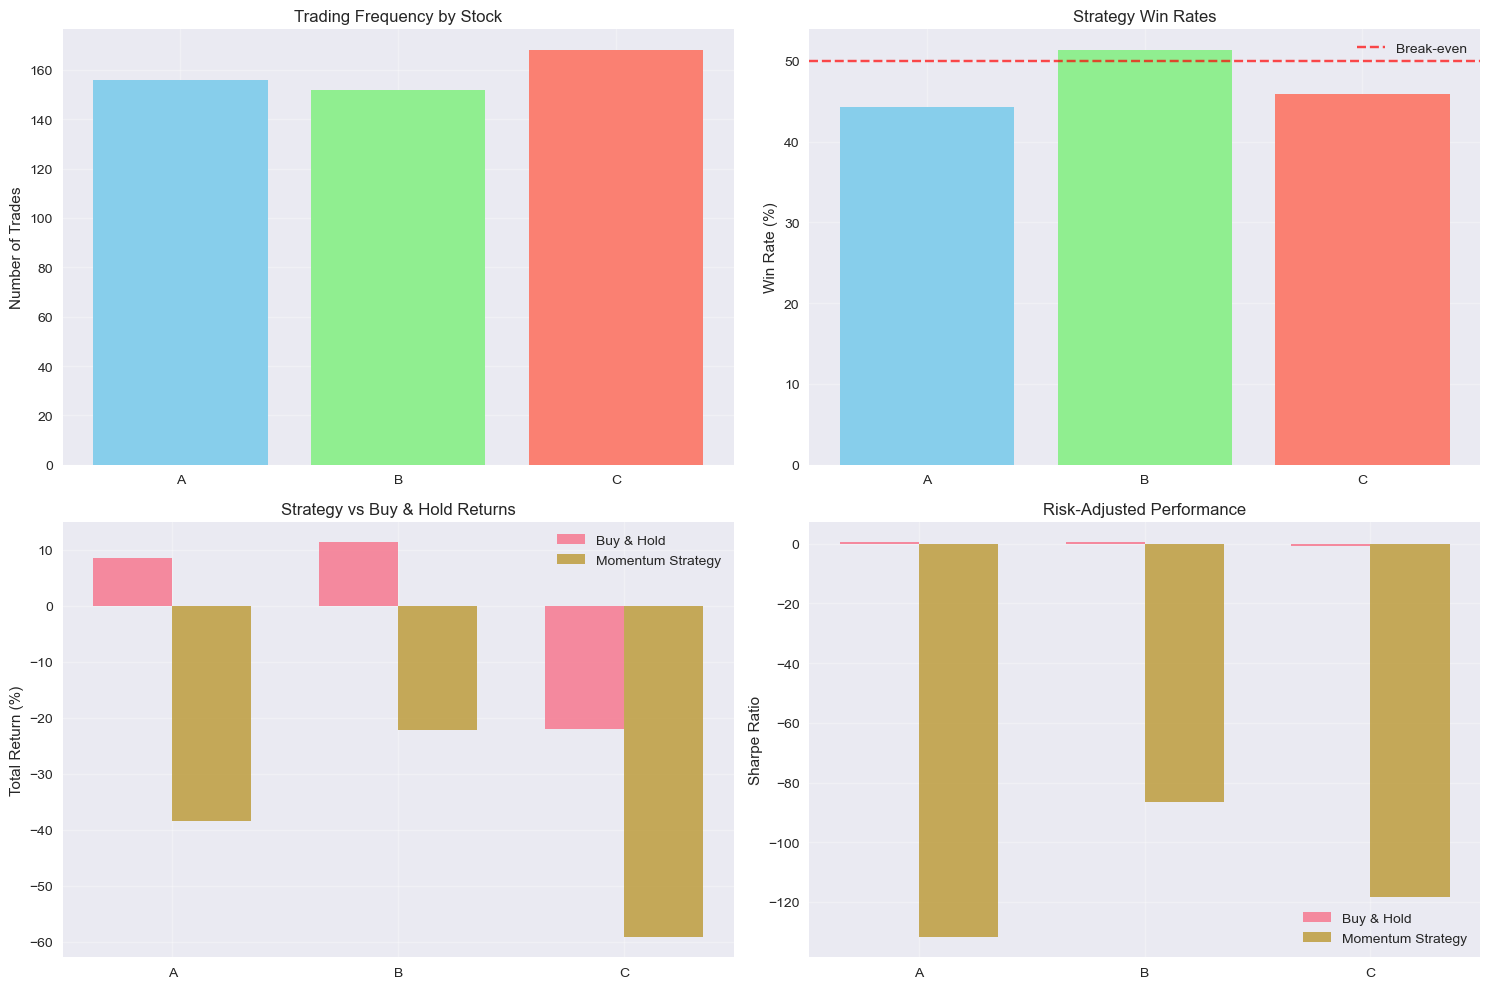

🎯 Strategy backtest complete!
💡 Key insights:
   - Transaction costs significantly impact short-term strategies
   - Win rate alone doesn't determine profitability (need good risk/reward)
   - Strategy performance varies significantly across different stocks
   - Higher volatility stocks may offer more trading opportunities


In [8]:
# Cell 7: Simple Trading Strategy Backtest
"""
Let's implement a simple momentum trading strategy and backtest it
This introduces key concepts:
- Signal generation
- Position sizing
- Transaction costs
- Performance evaluation
- Walk-forward testing
"""

def simple_momentum_strategy(prices, lookback_days=20, holding_days=5):
    """
    Simple momentum strategy:
    - Buy if stock outperformed over lookback period
    - Hold for specified days
    - Include transaction costs
    """
    returns = calculate_returns(prices)
    signals = []
    positions = []
    
    for i in range(lookback_days, len(prices) - holding_days):
        # Calculate momentum signal (return over lookback period)
        momentum = (prices[i] / prices[i - lookback_days]) - 1
        
        # Simple rule: buy if momentum > 2%, sell if momentum < -2%
        if momentum > 0.02:
            signal = 1  # Buy
        elif momentum < -0.02:
            signal = -1  # Sell
        else:
            signal = 0  # Hold
            
        signals.append(signal)
        
        # Calculate position return (assuming we hold for holding_days)
        if signal != 0:
            position_return = (prices[i + holding_days] / prices[i] - 1) * signal
            # Subtract transaction costs (0.1% per trade, round trip = 0.2%)
            position_return -= 0.002
        else:
            position_return = 0
            
        positions.append(position_return)
    
    return np.array(signals), np.array(positions)

# Test strategy on all stocks
strategy_results = {}

for name, prices in stocks.items():
    signals, position_returns = simple_momentum_strategy(prices)
    
    # Calculate strategy performance metrics
    total_trades = np.sum(np.abs(signals))
    winning_trades = np.sum(position_returns > 0)
    losing_trades = np.sum(position_returns < 0)
    win_rate = winning_trades / (winning_trades + losing_trades) if (winning_trades + losing_trades) > 0 else 0
    
    avg_win = np.mean(position_returns[position_returns > 0]) if winning_trades > 0 else 0
    avg_loss = np.mean(position_returns[position_returns < 0]) if losing_trades > 0 else 0
    
    cumulative_return = np.sum(position_returns)
    strategy_volatility = np.std(position_returns) * np.sqrt(252/5) if len(position_returns) > 1 else 0
    strategy_sharpe = (cumulative_return * 252/5 - 0.02) / strategy_volatility if strategy_volatility > 0 else 0
    
    strategy_results[name] = {
        'Total Trades': int(total_trades),
        'Win Rate': win_rate * 100,
        'Avg Win': avg_win * 100,
        'Avg Loss': avg_loss * 100,
        'Total Return': cumulative_return * 100,
        'Strategy Sharpe': strategy_sharpe,
        'Strategy Volatility': strategy_volatility * 100
    }

# Display strategy results
print("\n📊 MOMENTUM STRATEGY BACKTEST RESULTS")
print("=" * 60)
strategy_df = pd.DataFrame(strategy_results).T
print(strategy_df.round(2))

# Compare to buy-and-hold
print("\n📈 STRATEGY vs BUY-AND-HOLD COMPARISON")
print("=" * 50)
for name, prices in stocks.items():
    buy_hold_return = (prices[-1] / prices[0] - 1) * 100
    strategy_return = strategy_results[name]['Total Return']
    outperformance = strategy_return - buy_hold_return
    
    print(f"Stock {name}:")
    print(f"  Buy & Hold: {buy_hold_return:.1f}%")
    print(f"  Strategy: {strategy_return:.1f}%")
    print(f"  Outperformance: {outperformance:+.1f}%")
    print()

# Visualize strategy performance
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Trade frequency
trade_counts = [strategy_results[stock]['Total Trades'] for stock in strategy_results]
axes[0,0].bar(strategy_results.keys(), trade_counts, color=['skyblue', 'lightgreen', 'salmon'])
axes[0,0].set_ylabel('Number of Trades')
axes[0,0].set_title('Trading Frequency by Stock')
axes[0,0].grid(True, alpha=0.3)

# Win rates
win_rates = [strategy_results[stock]['Win Rate'] for stock in strategy_results]
axes[0,1].bar(strategy_results.keys(), win_rates, color=['skyblue', 'lightgreen', 'salmon'])
axes[0,1].axhline(50, color='red', linestyle='--', alpha=0.7, label='Break-even')
axes[0,1].set_ylabel('Win Rate (%)')
axes[0,1].set_title('Strategy Win Rates')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Return comparison
stock_names = list(strategy_results.keys())
buy_hold_returns = [(stocks[name][-1] / stocks[name][0] - 1) * 100 for name in stock_names]
strategy_returns = [strategy_results[name]['Total Return'] for name in stock_names]

x = np.arange(len(stock_names))
width = 0.35

axes[1,0].bar(x - width/2, buy_hold_returns, width, label='Buy & Hold', alpha=0.8)
axes[1,0].bar(x + width/2, strategy_returns, width, label='Momentum Strategy', alpha=0.8)
axes[1,0].set_ylabel('Total Return (%)')
axes[1,0].set_title('Strategy vs Buy & Hold Returns')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(stock_names)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Risk-adjusted returns (Sharpe ratios)
buy_hold_sharpes = [results[name]['Sharpe Ratio'] for name in stock_names]
strategy_sharpes = [strategy_results[name]['Strategy Sharpe'] for name in stock_names]

axes[1,1].bar(x - width/2, buy_hold_sharpes, width, label='Buy & Hold', alpha=0.8)
axes[1,1].bar(x + width/2, strategy_sharpes, width, label='Momentum Strategy', alpha=0.8)
axes[1,1].set_ylabel('Sharpe Ratio')
axes[1,1].set_title('Risk-Adjusted Performance')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(stock_names)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎯 Strategy backtest complete!")
print("💡 Key insights:")
print("   - Transaction costs significantly impact short-term strategies")
print("   - Win rate alone doesn't determine profitability (need good risk/reward)")
print("   - Strategy performance varies significantly across different stocks")
print("   - Higher volatility stocks may offer more trading opportunities")


🎲 MONTE CARLO RISK ANALYSIS (Stock A - 6 Month Horizon)
Current Price: $109.20
Simulations: 1,000

📊 Return Distribution:
  Mean Return: 5.2%
  Median Return: 4.1%
  Standard Deviation: 15.1%

⚠️  Value at Risk:
  95% VaR: -17.1% (95% chance loss won't exceed this)
  99% VaR: -25.0% (99% chance loss won't exceed this)

🎯 Scenario Probabilities:
  Probability of Loss: 39.4%
  Probability of >20% Loss: 2.6%
  Probability of >20% Gain: 15.9%


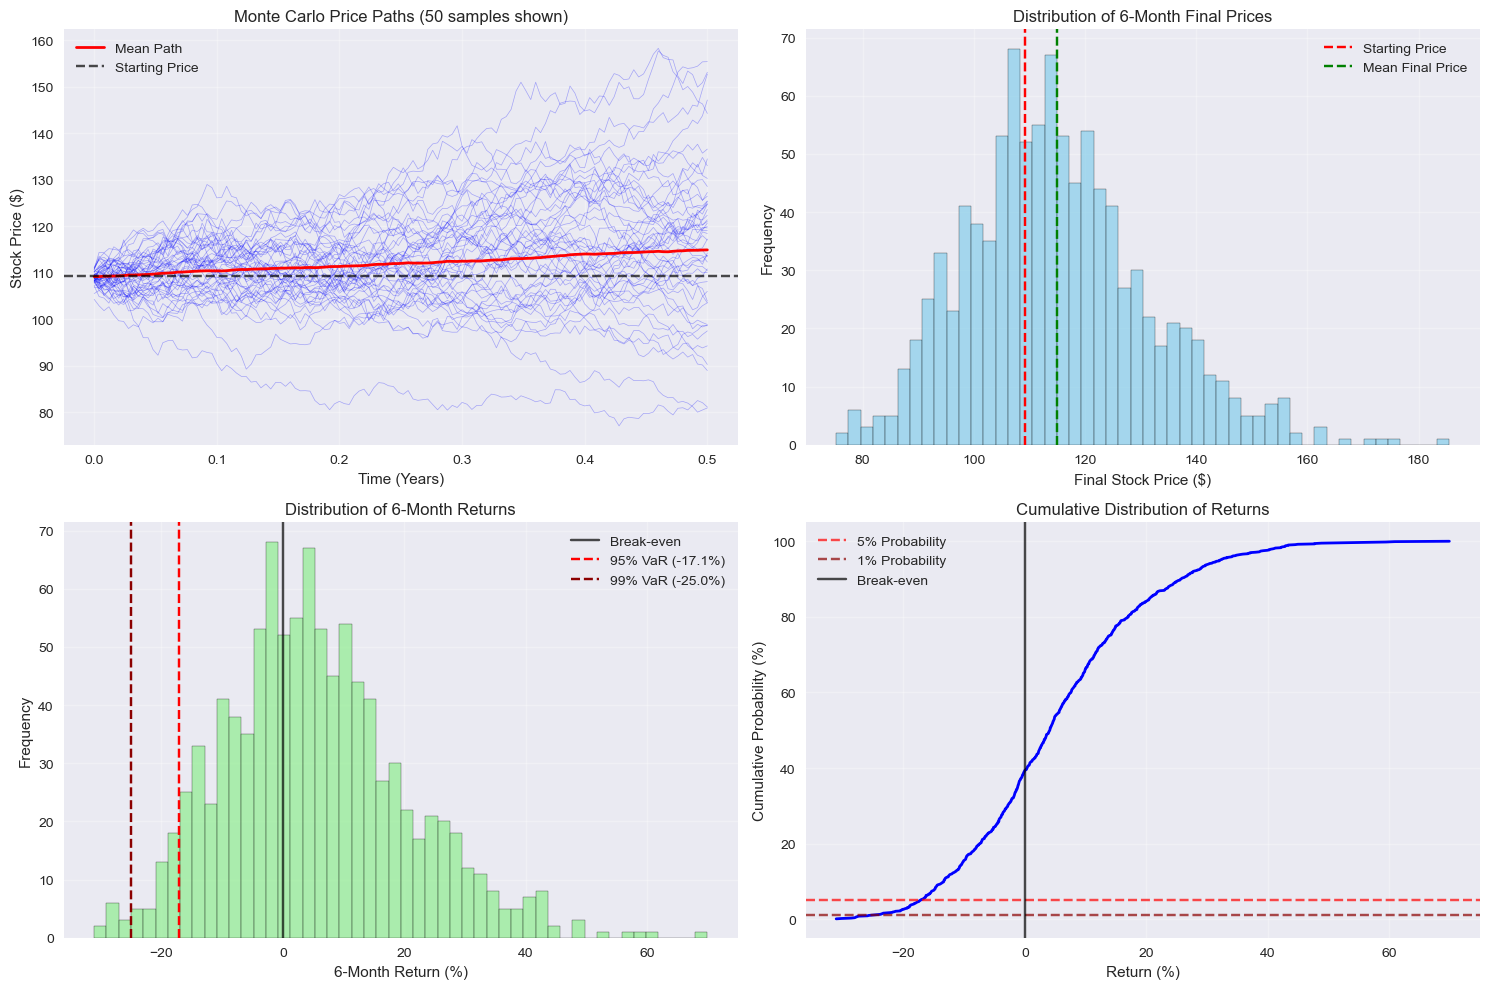


💼 PORTFOLIO MONTE CARLO ANALYSIS
Optimal Portfolio Weights: ['31.9%', '68.1%', '0.0%']
Portfolio 95% VaR: -7.8%
Portfolio 99% VaR: -13.0%
Probability of Loss: 26.0%


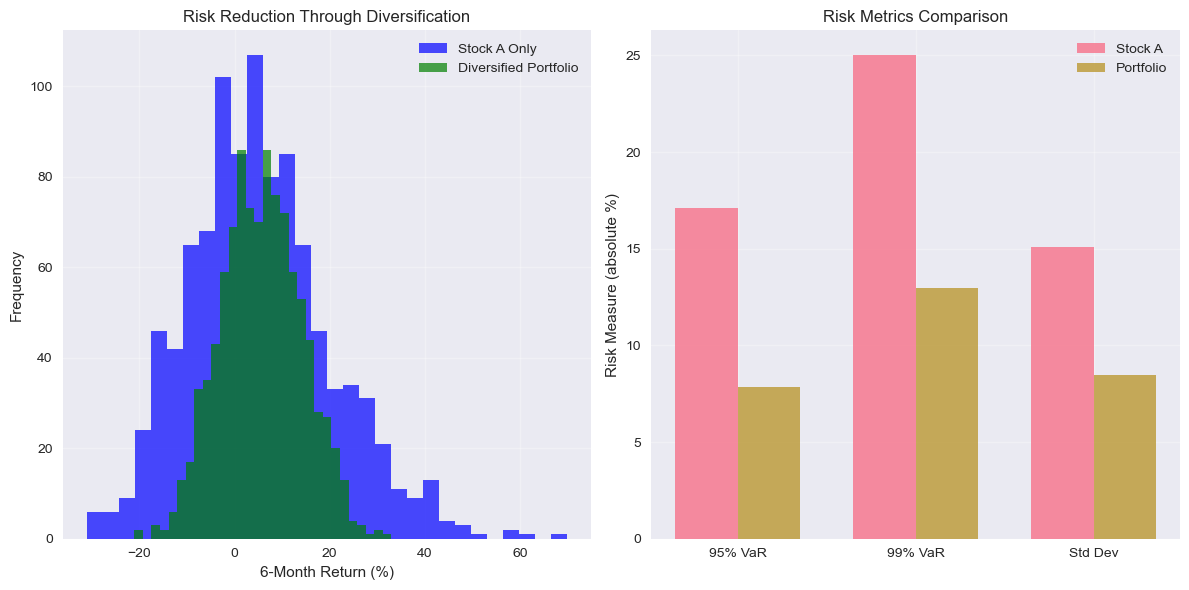

🎯 Monte Carlo analysis complete!
💡 Key insights:
   - Diversification significantly reduces portfolio risk
   - VaR provides quantitative risk measures for decision making
   - Monte Carlo helps understand full range of potential outcomes
   - Risk management is as important as return generation


In [9]:

# Cell 8: Monte Carlo Simulation for Risk Analysis
"""
Monte Carlo simulation is a powerful tool for risk analysis and scenario testing
We'll simulate thousands of possible future price paths to understand:
- Distribution of potential outcomes
- Value at Risk (VaR) calculations
- Probability of different scenarios
- Stress testing portfolios
"""

def monte_carlo_simulation(S0, mu, sigma, T, steps, num_simulations=1000):
    """
    Run Monte Carlo simulation for stock price paths
    
    Parameters:
    S0: Initial stock price
    mu: Expected annual return
    sigma: Annual volatility  
    T: Time horizon (years)
    steps: Number of time steps
    num_simulations: Number of simulation runs
    """
    dt = T / steps
    
    # Pre-allocate array for efficiency
    simulations = np.zeros((num_simulations, steps))
    
    for i in range(num_simulations):
        # Generate random shocks for this simulation
        random_shocks = np.random.normal(0, 1, steps)
        
        # Calculate price path
        price_changes = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_shocks
        log_prices = np.cumsum(price_changes)
        prices = S0 * np.exp(log_prices)
        
        simulations[i, :] = prices
    
    return simulations

# Run Monte Carlo simulation for Stock A
np.random.seed(123)  # For reproducible results
current_price_A = stock_A[-1]
annual_return_A = np.mean(calculate_returns(stock_A)) * 252
annual_vol_A = calculate_volatility(calculate_returns(stock_A))

# Simulate 6 months forward with 1000 scenarios
mc_simulations = monte_carlo_simulation(
    S0=current_price_A,
    mu=annual_return_A, 
    sigma=annual_vol_A,
    T=0.5,  # 6 months
    steps=126,  # ~6 months of trading days
    num_simulations=1000
)

# Analyze simulation results
final_prices = mc_simulations[:, -1]  # Final prices from all simulations
returns_6m = (final_prices / current_price_A - 1) * 100

# Calculate risk metrics
mean_return = np.mean(returns_6m)
median_return = np.median(returns_6m)
std_return = np.std(returns_6m)

# Value at Risk calculations (5% and 1% confidence levels)
var_95 = np.percentile(returns_6m, 5)  # 5% worst case
var_99 = np.percentile(returns_6m, 1)  # 1% worst case

# Probability calculations
prob_loss = np.sum(returns_6m < 0) / len(returns_6m) * 100
prob_big_loss = np.sum(returns_6m < -20) / len(returns_6m) * 100
prob_big_gain = np.sum(returns_6m > 20) / len(returns_6m) * 100

print(f"\n🎲 MONTE CARLO RISK ANALYSIS (Stock A - 6 Month Horizon)")
print("=" * 65)
print(f"Current Price: ${current_price_A:.2f}")
print(f"Simulations: {len(final_prices):,}")
print(f"\n📊 Return Distribution:")
print(f"  Mean Return: {mean_return:.1f}%")
print(f"  Median Return: {median_return:.1f}%") 
print(f"  Standard Deviation: {std_return:.1f}%")
print(f"\n⚠️  Value at Risk:")
print(f"  95% VaR: {var_95:.1f}% (95% chance loss won't exceed this)")
print(f"  99% VaR: {var_99:.1f}% (99% chance loss won't exceed this)")
print(f"\n🎯 Scenario Probabilities:")
print(f"  Probability of Loss: {prob_loss:.1f}%")
print(f"  Probability of >20% Loss: {prob_big_loss:.1f}%")
print(f"  Probability of >20% Gain: {prob_big_gain:.1f}%")

# Visualize Monte Carlo results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot sample price paths
time_axis = np.linspace(0, 0.5, 126)
for i in range(50):  # Plot first 50 simulations
    axes[0,0].plot(time_axis, mc_simulations[i, :], alpha=0.3, color='blue', linewidth=0.5)

axes[0,0].plot(time_axis, np.mean(mc_simulations, axis=0), 'red', linewidth=2, label='Mean Path')
axes[0,0].axhline(current_price_A, color='black', linestyle='--', alpha=0.7, label='Starting Price')
axes[0,0].set_xlabel('Time (Years)')
axes[0,0].set_ylabel('Stock Price ($)')
axes[0,0].set_title('Monte Carlo Price Paths (50 samples shown)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Distribution of final prices
axes[0,1].hist(final_prices, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].axvline(current_price_A, color='red', linestyle='--', label='Starting Price')
axes[0,1].axvline(np.mean(final_prices), color='green', linestyle='--', label='Mean Final Price')
axes[0,1].set_xlabel('Final Stock Price ($)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of 6-Month Final Prices')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Distribution of returns
axes[1,0].hist(returns_6m, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].axvline(0, color='black', linestyle='-', alpha=0.7, label='Break-even')
axes[1,0].axvline(var_95, color='red', linestyle='--', label=f'95% VaR ({var_95:.1f}%)')
axes[1,0].axvline(var_99, color='darkred', linestyle='--', label=f'99% VaR ({var_99:.1f}%)')
axes[1,0].set_xlabel('6-Month Return (%)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of 6-Month Returns')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Cumulative probability plot
sorted_returns = np.sort(returns_6m)
cumulative_prob = np.arange(1, len(sorted_returns) + 1) / len(sorted_returns) * 100

axes[1,1].plot(sorted_returns, cumulative_prob, 'blue', linewidth=2)
axes[1,1].axhline(5, color='red', linestyle='--', alpha=0.7, label='5% Probability')
axes[1,1].axhline(1, color='darkred', linestyle='--', alpha=0.7, label='1% Probability')
axes[1,1].axvline(0, color='black', linestyle='-', alpha=0.7, label='Break-even')
axes[1,1].set_xlabel('Return (%)')
axes[1,1].set_ylabel('Cumulative Probability (%)')
axes[1,1].set_title('Cumulative Distribution of Returns')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Portfolio-level Monte Carlo (using optimal weights from earlier)
print(f"\n💼 PORTFOLIO MONTE CARLO ANALYSIS")
print("=" * 40)

# Simulate correlated returns for all three stocks
def simulate_correlated_returns(expected_returns, cov_matrix, num_simulations=1000, time_horizon=0.5):
    """Simulate correlated stock returns using multivariate normal distribution"""
    
    # Annualized parameters to time horizon
    horizon_returns = expected_returns * time_horizon
    horizon_cov = cov_matrix * time_horizon
    
    # Generate correlated random returns
    simulated_returns = np.random.multivariate_normal(horizon_returns, horizon_cov, num_simulations)
    
    return simulated_returns

# Simulate portfolio returns
portfolio_simulations = simulate_correlated_returns(expected_returns, cov_matrix, 1000, 0.5)
portfolio_returns = np.dot(portfolio_simulations, optimal_weights) * 100

# Portfolio risk metrics
portfolio_var_95 = np.percentile(portfolio_returns, 5)
portfolio_var_99 = np.percentile(portfolio_returns, 1)
portfolio_prob_loss = np.sum(portfolio_returns < 0) / len(portfolio_returns) * 100

print(f"Optimal Portfolio Weights: {[f'{w:.1%}' for w in optimal_weights]}")
print(f"Portfolio 95% VaR: {portfolio_var_95:.1f}%")
print(f"Portfolio 99% VaR: {portfolio_var_99:.1f}%") 
print(f"Probability of Loss: {portfolio_prob_loss:.1f}%")

# Compare individual stock vs portfolio risk
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(returns_6m, bins=30, alpha=0.7, label='Stock A Only', color='blue')
plt.hist(portfolio_returns, bins=30, alpha=0.7, label='Diversified Portfolio', color='green')
plt.xlabel('6-Month Return (%)')
plt.ylabel('Frequency')
plt.title('Risk Reduction Through Diversification')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
risk_comparison = pd.DataFrame({
    'Metric': ['95% VaR', '99% VaR', 'Std Dev'],
    'Stock A': [var_95, var_99, std_return],
    'Portfolio': [portfolio_var_95, portfolio_var_99, np.std(portfolio_returns)]
})

x = np.arange(len(risk_comparison['Metric']))
width = 0.35

plt.bar(x - width/2, np.abs(risk_comparison['Stock A']), width, label='Stock A', alpha=0.8)
plt.bar(x + width/2, np.abs(risk_comparison['Portfolio']), width, label='Portfolio', alpha=0.8)
plt.ylabel('Risk Measure (absolute %)')
plt.title('Risk Metrics Comparison')
plt.xticks(x, risk_comparison['Metric'])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎯 Monte Carlo analysis complete!")
print("💡 Key insights:")
print("   - Diversification significantly reduces portfolio risk")
print("   - VaR provides quantitative risk measures for decision making")
print("   - Monte Carlo helps understand full range of potential outcomes")
print("   - Risk management is as important as return generation")


In [10]:
# Cell 9: Experiment Playground
"""
This cell is for your own experiments! Try modifying parameters and see what happens.
Some ideas to explore:
1. Change volatility levels and see impact on option prices
2. Modify the momentum strategy parameters (lookback, holding period, thresholds)
3. Create your own simple trading signals
4. Test different portfolio allocations
5. Run stress tests with extreme market scenarios
"""

print("🧪 EXPERIMENT PLAYGROUND")
print("=" * 30)
print("This is your space to experiment! Try:")
print("1. Changing parameters in any of the above functions")
print("2. Creating your own trading signals")
print("3. Testing different portfolio allocations") 
print("4. Exploring option strategies")
print("5. Running custom Monte Carlo scenarios")
print("\nExample experiments:")

# Example 1: High volatility impact on options
print("\n🔬 Experiment 1: High volatility scenario")
high_vol = 0.50  # 50% volatility
normal_vol = 0.20  # 20% volatility

atm_call_high_vol = black_scholes_call(current_price, current_price, 0.25, 0.05, high_vol)
atm_call_normal_vol = black_scholes_call(current_price, current_price, 0.25, 0.05, normal_vol)

print(f"ATM Call price with 20% vol: ${atm_call_normal_vol:.2f}")
print(f"ATM Call price with 50% vol: ${atm_call_high_vol:.2f}")
print(f"Difference: ${atm_call_high_vol - atm_call_normal_vol:.2f} ({((atm_call_high_vol/atm_call_normal_vol)-1)*100:.0f}% increase)")

# Example 2: Portfolio stress test
print("\n🔬 Experiment 2: Market crash scenario")
crash_returns = np.array([-0.30, -0.25, -0.35])  # 30%, 25%, 35% drops
portfolio_crash_loss = np.dot(crash_returns, optimal_weights) * 100
print(f"Portfolio loss in crash scenario: {portfolio_crash_loss:.1f}%")

# Example 3: Transaction cost sensitivity
print("\n🔬 Experiment 3: Transaction cost impact")
def strategy_with_costs(transaction_cost_pct):
    """Test how transaction costs affect strategy performance"""
    signals, position_returns = simple_momentum_strategy(stock_A)
    # Recalculate returns with different transaction costs
    adjusted_returns = []
    for signal, ret in zip(signals, position_returns):
        if signal != 0:
            adjusted_ret = ret - (transaction_cost_pct / 100)
        else:
            adjusted_ret = ret
        adjusted_returns.append(adjusted_ret)
    return np.sum(adjusted_returns) * 100

costs = [0.1, 0.2, 0.5, 1.0]  # Different transaction cost levels
for cost in costs:
    strategy_return = strategy_with_costs(cost)
    print(f"Strategy return with {cost}% transaction costs: {strategy_return:.1f}%")

print("\n" + "="*50)
print("🎓 LEARNING CHECKPOINT")
print("="*50)
print("Congratulations! You've implemented:")
print("✅ Stock price simulation using Geometric Brownian Motion")
print("✅ Financial metrics calculation (returns, volatility, Sharpe ratio)")
print("✅ Black-Scholes option pricing model")
print("✅ Option Greeks for risk management")  
print("✅ Portfolio optimization using mean-variance theory")
print("✅ Trading strategy backtesting framework")
print("✅ Monte Carlo simulation for risk analysis")
print("✅ Portfolio risk assessment and diversification benefits")
print("\nNext steps in your quantitative journey:")
print("📚 Study more advanced models (Heston, jump diffusion)")
print("💻 Build real-time data pipelines") 
print("🔍 Explore machine learning for signal generation")
print("⚡ Implement high-frequency trading concepts")
print("🏛️ Learn institutional risk management frameworks")

print("\n🚀 Ready to dive deeper into quantitative finance!")
print("Use this notebook as your foundation and keep experimenting!")

🧪 EXPERIMENT PLAYGROUND
This is your space to experiment! Try:
1. Changing parameters in any of the above functions
2. Creating your own trading signals
3. Testing different portfolio allocations
4. Exploring option strategies
5. Running custom Monte Carlo scenarios

Example experiments:

🔬 Experiment 1: High volatility scenario
ATM Call price with 20% vol: $5.04
ATM Call price with 50% vol: $11.49
Difference: $6.45 (128% increase)

🔬 Experiment 2: Market crash scenario
Portfolio loss in crash scenario: -26.6%

🔬 Experiment 3: Transaction cost impact
Strategy return with 0.1% transaction costs: -54.0%
Strategy return with 0.2% transaction costs: -69.6%
Strategy return with 0.5% transaction costs: -116.4%
Strategy return with 1.0% transaction costs: -194.4%

🎓 LEARNING CHECKPOINT
Congratulations! You've implemented:
✅ Stock price simulation using Geometric Brownian Motion
✅ Financial metrics calculation (returns, volatility, Sharpe ratio)
✅ Black-Scholes option pricing model
✅ Option Gr